<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%207-%20VGG19/VGG19_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG19


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import VGG19
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Load pre-trained VGG19 model without the top (classification) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

80134624/80134624 [==============================] - 114s 1us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Reshape the images to fit VGG input dimensions
x_train_vgg = tf.image.grayscale_to_rgb(tf.image.resize(x_train, (48, 48)))
x_test_vgg = tf.image.grayscale_to_rgb(tf.image.resize(x_test, (48, 48)))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train_vgg, y_train, epochs=3, batch_size=50, validation_data=(x_test_vgg, y_test))

Epoch 1/3
1200/1200 [==============================] - 296s 246ms/step - loss: 0.2271 - accuracy: 0.9316 - val_loss: 0.1175 - val_accuracy: 0.9632
Epoch 2/3
1200/1200 [==============================] - 291s 242ms/step - loss: 0.1075 - accuracy: 0.9656 - val_loss: 0.0916 - val_accuracy: 0.9701
Epoch 3/3
1200/1200 [==============================] - 285s 238ms/step - loss: 0.0897 - accuracy: 0.9712 - val_loss: 0.0906 - val_accuracy: 0.9679


In [ ]:
model.save("C:/Users/csconda1/Documents/325-Bhagavath/modelvgg19_model_epoch3")

INFO:tensorflow:Assets written to: C:/Users/csconda1/Documents/325-Bhagavath/modelvgg19_model_epoch3\assets


INFO:tensorflow:Assets written to: C:/Users/csconda1/Documents/325-Bhagavath/modelvgg19_model_epoch3\assets


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_vgg, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 43s 137ms/step - loss: 0.0906 - accuracy: 0.9679
Test accuracy: 0.9678999781608582


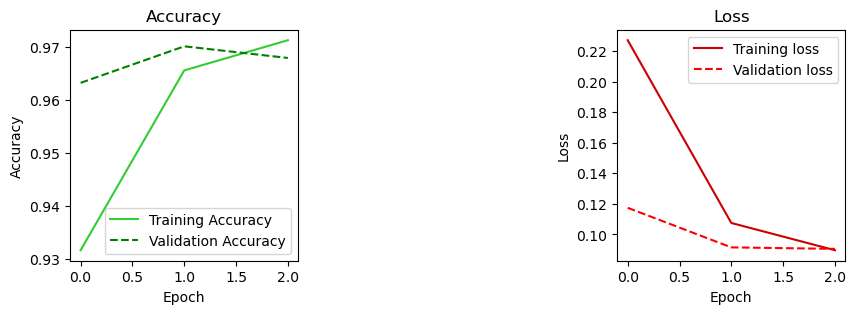

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label='Training Accuracy',color='limegreen')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='green', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,3,3)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training loss', color='#cc0000',)
plt.plot(history.history['val_loss'], label='Validation loss',color = "#ff0000", linestyle = 'dashed')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Load some test images
test_images = x_test_vgg[:10]

# Make predictions on the test images
predictions = model.predict(test_images)

1/1 [==============================] - 0s 191ms/step


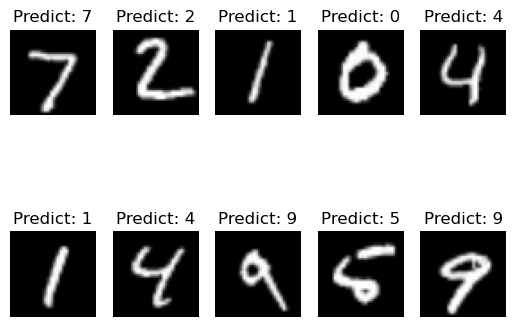

In [ ]:
# Plot the test images and their predictions
for i in range(len(test_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predict: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()